# Function Approximation with a Linear Model
$y=f(x)=\sin x$ <br />
Approximate this function with a linear function of the form <br />
$y = w_0 + w_1 x + w_2 x^2$ <br />
in the range $x\in(0,2\pi)$

In [0]:
import numpy as np

### Generate data

In [0]:
def fx(x):
    '''
    Input:
        x: float (scalar) or np array
    Output:
        y: float (scalar) or np array; y=f(x)=sin(x)
        
    HINT: Use web search on how to take sine in numpy
    '''
    # YOUR CODE HERE
    y = np.sin(x)
    return y

In [0]:
'''Testing'''
def test_fx():
    assert fx(0)==0
    assert np.isclose(fx(np.pi/2), 1, atol=0.001)
    assert np.isclose(fx(np.pi/4), 0.707, atol=0.001)
    print('Test passed', '\U0001F44D')
test_fx()

Test passed 👍


In [0]:
def generateX_fx(N):
    '''
    Generate N random points in the range (0,1)
    Input:
        N: int
    Outputs:
        x: np vector of shape (N,)
        y: np vector of shape (N,); y=f(x)
    '''
    x=np.random.rand(N)*np.pi*2
    yd=fx(x)
    
    return x, yd

In [0]:
'''Testing'''
def test_generateX_fx():
    x, yd = generateX_fx(20)
    assert x.shape[0]==20
    assert yd.shape[0]==20
    print('Test passed', '\U0001F44D')
test_generateX_fx()

Test passed 👍


### Plotting

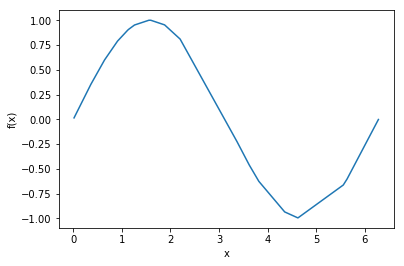

In [5]:
def plotdata():
    x, yd = generateX_fx(20)
    import matplotlib.pyplot as plt
    i = x.argsort()
    plt.plot(x[i],yd[i])
    plt.ylabel('f(x)')
    plt.xlabel('x')
plotdata()

## Training
We will now define a linear model to estimate the above function, and train it with all the data

### Define model
$y = \sum_{d=0}^D w_d x^d$, here, $D$ is the degree of the model, say D=2 <br />

In matrix representation: y = Aw <br/>

In [6]:
def createA(x, D):
    '''
    Create the matrix A with degree D
    Input:
        x: np vector of shape (N,)
        D: degree of the model
    Output:
        A: np matrix of shape (N,D+1)
    '''
    h=[]
    t=[]
    
    #print(A)
    
    print(x)
    
                               
    for i in x:
      for k in range(D+1):
        t.append(i**k)
        
      h.append(t)
      t=[]
      
    A=np.array(h) 
    print(A)
    return A
x = np.array([1,2,3])
A = createA(x, 2)

[1 2 3]
[[1 1 1]
 [1 2 4]
 [1 3 9]]


In [0]:
'''Testing'''
def test_createA():
    x = np.array([1,2,3])
    A = createA(x, 2)
    assert A.shape==(3,3)
    assert np.all(A[0,:]==1)
    assert np.all(A==np.array([[1.0, 1.0, 1.0], [1.0, 2.0, 4.0], [1.0, 3.0, 9.0]]))
    print('Test passed', '\U0001F44D')
test_createA()

[1 2 3]
[[1 1 1]
 [1 2 4]
 [1 3 9]]
Test passed 👍


### Estimate Weights
Estimate w from yd and A. Use the least square solution you learnt in the video

In [7]:
def train_w(A, yd):
    '''
    Inputs:
        A: np matrix of shape (N,D+1)
        yd: np vector of shape (N,)
    Output:
        w: np vector of shape (D+1,)
    '''
    w=(2*np.random.rand(A.shape[1],)-1)/2
    print(w)
    return w
    eta=0.006
A = np.array([[1.0, 1.0, 1.0], [1.0, 2.0, 4.0], [1.0, 3.0, 9.0]])
yd = np.array([1,2,3])
train_w(A,yd)


[0.11463325 0.45559649 0.00997728]


array([0.11463325, 0.45559649, 0.00997728])

In [0]:
'''Testing'''
def test_train_w():
    A = np.array([[1.0, 1.0, 1.0], [1.0, 2.0, 4.0], [1.0, 3.0, 9.0]])
    yd = np.array([1,2,3])
    assert np.all(np.isclose(train_w(A, yd), np.array([0,1,0]), atol=.001))
    yd = yd*yd
    assert np.all(np.isclose(train_w(A, yd), np.array([0,0,1]), atol=.001))
    print('Test passed', '\U0001F44D')
test_train_w()

NameError: ignored

### Estimate y from the model, given x

In [8]:
def predict_y(w, x):
    '''
    Inputs:
        w: np vector of shape (D+1,)
        x: np vector of shape (N,)
    Outputs:
        y: np vector of shape (N,); y=Aw
    '''
    # YOUR CODE HERE
    
    shape1=w.shape
    D=shape1[0]-1
    shape2=x.shape
    N=shape2[0]
    A=createA(x,D)
    y=np.empty((N,))
    y=np.dot(A,w)
    print(y)
    return y
w = np.array([1,2,3])
x = np.array([0.2,0.5,0.6])
predict_y(w,x)

[0.2 0.5 0.6]
[[1.   0.2  0.04]
 [1.   0.5  0.25]
 [1.   0.6  0.36]]
[1.52 2.75 3.28]


array([1.52, 2.75, 3.28])

In [0]:
def test_predict_y():
    w = np.array([1,2,3])
    x = np.array([0.2,0.5,0.6])
    y = predict_y(w, x)
    assert np.all(np.isclose(y, np.array([1.52, 2.75, 3.28]), atol=0.001))
    print('Test passed', '\U0001F44D')
test_predict_y()

### Estimate Error
Find E as the mean squared error

In [9]:
def compute_mse(y, yd):
    '''
    Inputs:
        y: np vector of shape (N,); y=Aw
        yd: np vector of shape (N,); yd=f(x), ie., desired or true value
    Output:
        mse: mean squared error
    '''
    # YOUR CODE HERE
    error_matrix=(y-yd)**2
    mse=sum(error_matrix)/2
    
    return mse
yd = np.array([1,0,1,0])
y = np.array([.8,.2,.8,.2])
compute_mse(y,yd)

0.07999999999999999

In [0]:
'''Testing'''
def test_compute_mse():
    yd = np.array([1,0,1,0])
    y = np.array([.8,.2,.8,.2])
    assert np.isclose(compute_mse(y, yd), 0.04, atol=0.003)
    print('Test passed', '\U0001F44D')
test_compute_mse()

### Plotting


In [0]:
def plotModel(x, y, yd):
    import matplotlib.pyplot as plt
    i = x.argsort()
    plt.figure()
    plt.plot(x[i],y[i],'g-o')
    plt.plot(x[i],yd[i],'r-o')
    plt.ylabel('f(x)')
    plt.xlabel('x')
    plt.legend(['estimated', 'true'])

# EXPERIMENTS
## Could you train it?
Using the above functions:
- Generate 20 training points
- Train your linear model using x and yd
- Predict y (using the linear model you found above) for the training data x
- Compare y with yd to find the mean-squared error 

[5.28233249 0.15222383 2.81169249 3.16638201 2.90403762 1.62452858
 2.77744003 0.80173573 0.69448275 2.24966663 0.19417968 0.44162097
 4.61294904 1.07609951 5.35298909]
[[1.00000000e+00 5.28233249e+00 2.79030365e+01]
 [1.00000000e+00 1.52223825e-01 2.31720930e-02]
 [1.00000000e+00 2.81169249e+00 7.90561464e+00]
 [1.00000000e+00 3.16638201e+00 1.00259751e+01]
 [1.00000000e+00 2.90403762e+00 8.43343448e+00]
 [1.00000000e+00 1.62452858e+00 2.63909309e+00]
 [1.00000000e+00 2.77744003e+00 7.71417314e+00]
 [1.00000000e+00 8.01735727e-01 6.42780175e-01]
 [1.00000000e+00 6.94482753e-01 4.82306294e-01]
 [1.00000000e+00 2.24966663e+00 5.06099995e+00]
 [1.00000000e+00 1.94179677e-01 3.77057471e-02]
 [1.00000000e+00 4.41620965e-01 1.95029077e-01]
 [1.00000000e+00 4.61294904e+00 2.12792988e+01]
 [1.00000000e+00 1.07609951e+00 1.15799016e+00]
 [1.00000000e+00 5.35298909e+00 2.86544922e+01]]
[-0.13909464  0.31342399 -0.44947859]
[5.28233249 0.15222383 2.81169249 3.16638201 2.90403762 1.62452858
 2.77

(array([5.28233249, 0.15222383, 2.81169249, 3.16638201, 2.90403762,
        1.62452858, 2.77744003, 0.80173573, 0.69448275, 2.24966663,
        0.19417968, 0.44162097, 4.61294904, 1.07609951, 5.35298909]),
 array([-6.81016532, -0.08520383, -1.56867431, -2.09239121, -1.69764215,
        -0.37369989, -1.52215957, -0.04958055, -0.03773561, -0.895858  ,
        -0.07513297, -0.03756544, -5.02254267, -0.11179517, -7.01479545]),
 array([-0.84193146,  0.15163662,  0.32394858, -0.02478682,  0.23532703,
         0.99855677,  0.35615761,  0.7185643 ,  0.63998808,  0.77828257,
         0.19296169,  0.42740548, -0.99505992,  0.88011269, -0.80173723]),
 array([-0.13029614,  0.34733946, -0.29714542]),
 56.31360896402808)

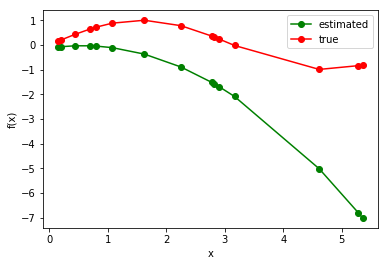

In [20]:
def trainModel(N, D):
    '''
    Inputs:
        N: number of samples
        D: degree of the model
    Outputs:
        x: np array of size (N,)
        y: np array of size (N,)
        yd: np array of size (N,)
        w: np array of size (D+1,)
        mse: scalar float
    '''
    # YOUR CODE HERE
    eta=0.000015
    x,yd=generateX_fx(N)
    A=createA(x, D)
    w=train_w(A, yd)
    for i in range(15):
      y=predict_y(w,x)
      e=yd-y
      w=w+eta*(A.T.dot(e))
    #y=predict_y(w, x)
    mse=compute_mse(y, yd)
    plotModel(x,y,yd)
    
    
    return x, y, yd, w, mse
N = 15
D = 2
trainModel(N, D)


In [0]:
'''testing'''
def test_trainModel():
    N = 20
    D = 2
    x, y, yd, w, mse = trainModel(N,D)
    assert x.shape[0]==20
    assert w.shape[0]==D+1
    print(w)
    print('MSE on train data = ', mse)
    plotModel(x,y,yd)
    print('Test passed', '\U0001F44D')
test_trainModel()

## Could you test it on new (test) points?
Using the above functions:
- Generate 30 test points
- Estimate y using the linear model w you found above. Do NOT train again
- Compare y with yd to find the mean-squared error <br />

In [0]:
def testModel(Ntest, w):
    '''
    Inputs:
        Ntest: number of test samples to be generated
        w: np array of size (D+1,)
    Outputs:
        x: np array of size (N,)
        y: np array of size (N,)
        yd: np array of size (N,)
        mse: scalar float
    '''
    # YOUR CODE HERE
    return x, y, yd, mse

In [0]:
'''Testing'''
def test_testModel():
    N = 30
    D = 10
    x, y, yd, w, mse = trainModel(N,D)
    assert x.shape[0]==N
    assert w.shape[0]==D+1
    print(w)
    print('MSE on train data = ', mse)
    plotModel(x,y,yd)
    Ntest = 50
    x, y, yd, mse = testModel(Ntest,w)
    print('MSE on test data = ', mse)
    plotModel(x,y,yd)
    print('Test passed', '\U0001F44D')
test_testModel()

# ADVANCED

## Does the performance improve with increasing the number of training points?
- Repeat the training with different no. of samples. Take N=3, 5, 10, 30; and D=5
- Plot training error vs N
- Plot test error vs N

## Does the performance improve with increasing the degree D of the model?
- Repeat the training with different degree models. Take D=0, 1, 2, 4, 7, 12, and N=10
- Plot training error vs D
- Plot test error vs D
- Plot y vs x for each D